In [1]:
!pip install rdkit

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

# Load CSV with one column of SMILES
df = pd.read_csv("generated_Molecules.csv")  # Replace with your actual file
df.columns = ['smiles']  # Ensure the column is named 'Smiles'



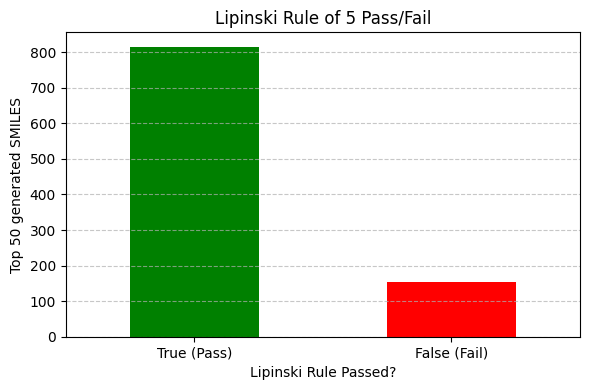

In [21]:
# Function to evaluate Lipinski Rule of 5
def lipinski_filter(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Invalid SMILES
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    return (mw <= 500) and (logp <= 5) and (hbd <= 5) and (hba <= 10)

# Apply Lipinski filter
df['Lipinski'] = df['smiles'].apply(lipinski_filter)
df = df.dropna(subset=['Lipinski'])  # Remove invalid SMILES if any

# Count True/False
counts = df['Lipinski'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['green', 'red'])
plt.title("Lipinski Rule of 5 Pass/Fail")
plt.xlabel("Lipinski Rule Passed?")
plt.ylabel("Top 50 generated SMILES")
plt.xticks([0, 1], ['True (Pass)', 'False (Fail)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
